<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [ ]:
# Set your student number
student_number = 400101323
Name = 'Mahdi'
Last_Name = 'Zinati'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

In [1]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/0f/02/8d3f83e01cf7fd72884fe84d4ff737ce774c5a7653bb826cf7acd39179f3/torchvision-0.18.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torch==2.3.1 from https://files.pythonhosted.org/packages/d0/5f/f41b14a398d484bf218d5167ec9061c1e76f500d9e25166117818c8bacda/torch-2.3.1-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 375.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 157.6 kB/s eta 0:00:0000:0100:09
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Succe

## Importing Libraries

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [3]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|███████████████████████████| 26421880/26421880 [03:09<00:00, 139621.97it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 182028.81it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|█████████████████████████████| 4422102/4422102 [00:25<00:00, 171015.20it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|███████████████████████████████████| 5148/5148 [00:00<00:00, 445863.49it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [4]:
n = len(train_set.classes)
d = train_set[0][0].shape[1] * train_set[0][0].shape[2]

print("No. classes : ",n)
print("dimension : ",d)

No. classes :  10
dimension :  784


In [31]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

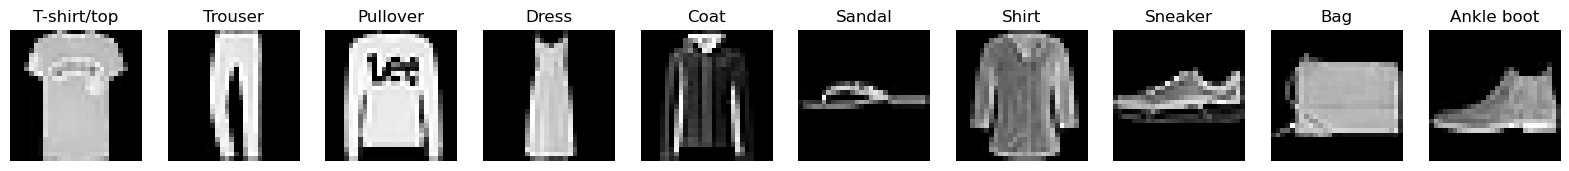

In [6]:
fig, X = plt.subplots(nrows=1, ncols=len(train_set.classes), figsize=(20, 10))
n = len(train_set.classes)
for i in range(n):
    rnd = np.where(test_set.targets == i)[0][0]
    image = test_set[rnd][0].numpy().transpose(1, 2, 0)
    X[i].imshow(image, cmap='gray')
    X[i].set_title(train_set.classes[i])
    X[i].axis('off')
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [7]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [9]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (d, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, n)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:
def affine_forward(x, w, b):
    return x @ w+b

def relu(x):
    return torch.maximum(x, torch.zeros_like(x))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [44]:
def model(input_tensor: torch.Tensor, parameters, num_layers=n):
    batch_size = input_tensor.shape[0]
    reshaped_input = input_tensor.view(batch_size, -1)

    for layer_index in range(num_layers):
        weight_key = f'w{layer_index}'
        bias_key = f'b{layer_index}'
        if weight_key not in parameters or bias_key not in parameters:
            raise KeyError(f"Parameter keys {weight_key} or {bias_key} not found in parameters.")
        
        weight_matrix = parameters[weight_key]
        bias_vector = parameters[bias_key]
        reshaped_input = affine_forward(reshaped_input, weight_matrix, bias_vector)
        
        if layer_index < num_layers - 1:
            reshaped_input = relu(reshaped_input)
    
    output = reshaped_input
    return output


Implementing cross entropy loss:

In [45]:
def cross_entropy_loss(scores, y):
    n = len(y)
    exp_scr = torch.exp(scores)
    sftmx_scr = exp_scr / exp_scr.sum(dim=1, keepdim=True)
    log_ll = torch.log(sftmx_scr[range(n), y])
    loss = -log_ll.sum() / n
    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [46]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    for param_name, param_tensor in parameters.items():
        if param_tensor.grad is not None:
            param_tensor.data -= learning_rate * param_tensor.grad
            param_tensor.grad.zero_()
            pass

Training functions:

In [47]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    acc = (y_pred == y_true).mean()
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    train_loss = 0
    N_train = len(train_loader.dataset)
    
    Y = []
    Y_pred = []
    
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)
        loss = cross_entropy_loss(p, y)
        loss.backward()
        sgd_optimizer(parameters, learning_rate)
        train_loss += loss.item()
        for param in parameters.values():
            param.grad.zero_()
        print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    train_loss /= N_train
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    total_loss = 0
    N = len(loader.dataset)
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)
        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()
        print(f'Epoch: {epoch}, Batch: {i}, {set_name} Loss: {loss.item()}')
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
        
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc


In [48]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [49]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    train_loader, test_loader = dataloaders
    for epoch in range(num_epochs):
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        test_loss, test_acc = validate(test_loader, epoch, "Test")
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
    plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()

    plt.show()

Accuracy of train set: 0.17565
Accuracy of Test set: 0.2628
Accuracy of train set: 0.2707833333333333
Accuracy of Test set: 0.38065
Accuracy of train set: 0.5468166666666666
Accuracy of Test set: 0.6009333333333333
Accuracy of train set: 0.6507333333333334
Accuracy of Test set: 0.6929166666666666
Accuracy of train set: 0.7143333333333334
Accuracy of Test set: 0.7285666666666667
Accuracy of train set: 0.7505166666666667
Accuracy of Test set: 0.7640166666666667
Accuracy of train set: 0.76925
Accuracy of Test set: 0.7732333333333333
Accuracy of train set: 0.78345
Accuracy of Test set: 0.78145
Accuracy of train set: 0.7970333333333334
Accuracy of Test set: 0.79605
Accuracy of train set: 0.80565
Accuracy of Test set: 0.8109
Accuracy of train set: 0.8119166666666666
Accuracy of Test set: 0.80025
Accuracy of train set: 0.81705
Accuracy of Test set: 0.8224666666666667
Accuracy of train set: 0.8222666666666667
Accuracy of Test set: 0.8265333333333333
Accuracy of train set: 0.8257
Accuracy of Te

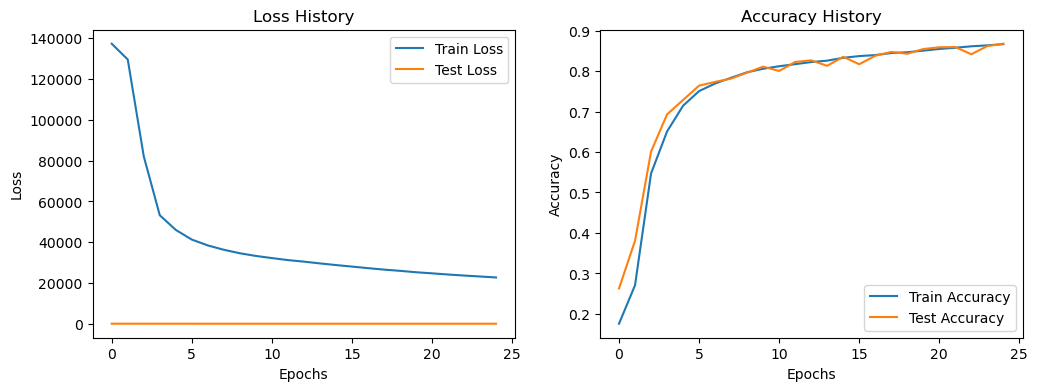

In [50]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [51]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8675666666666667


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

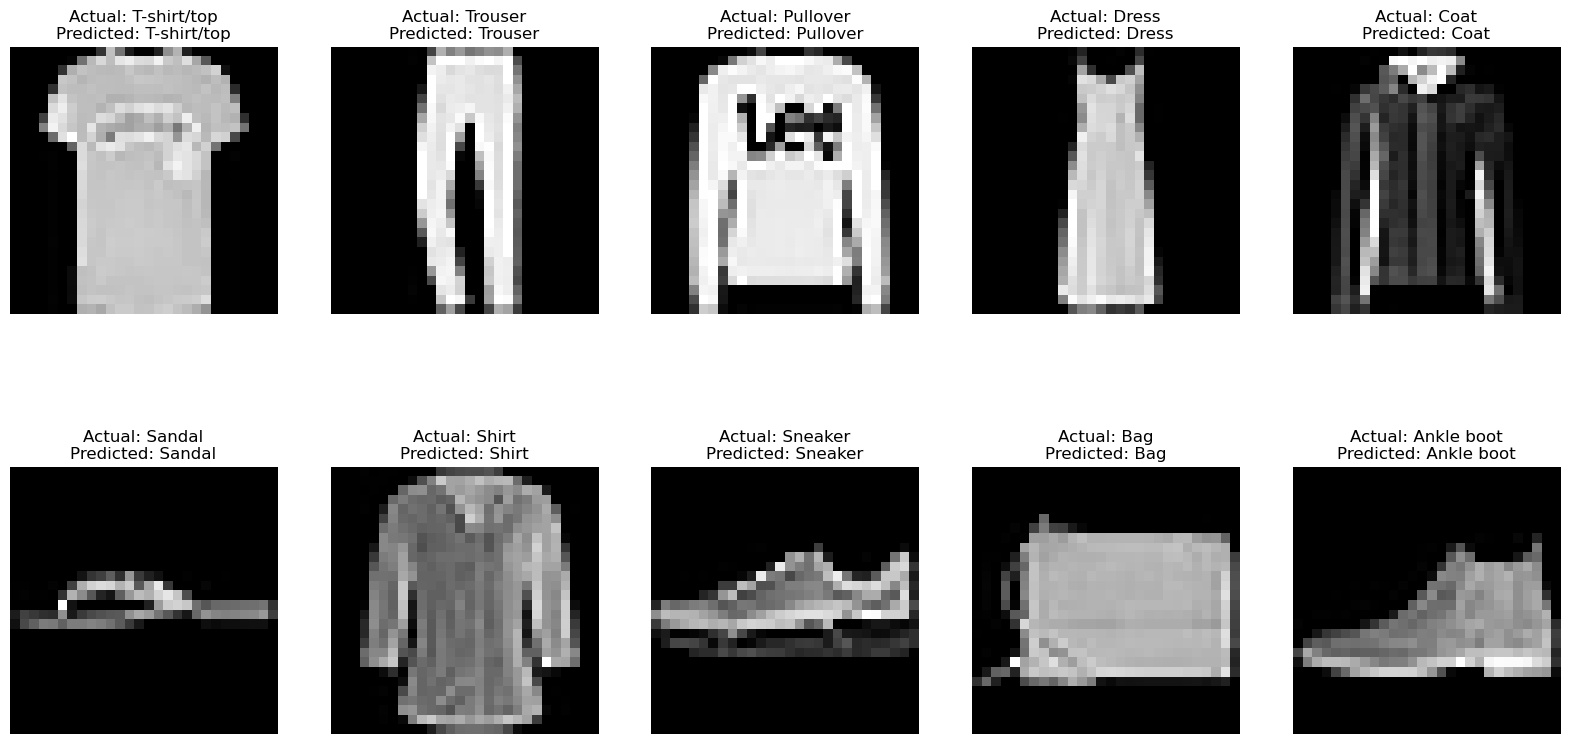

In [54]:
sample_images = {}
for class_index in range(n):
    img_index = np.where(test_set.targets == class_index)[0][0]
    sample_images[class_index] = test_set[img_index][0]

sample_images_tensor = torch.stack(list(sample_images.values()))

with torch.no_grad():
    predictions = model(sample_images_tensor.to(device), parameters)

predicted_classes = torch.argmax(predictions, dim=1).cpu().numpy()

plt.figure(figsize=(20, 10))
for class_index in range(n):
    plt.subplot(2, 5, class_index + 1)
    plt.imshow(sample_images[class_index].permute(1, 2, 0), cmap='gray')
    plt.title(f"Actual: {test_set.classes[class_index]}\nPredicted: {test_set.classes[predicted_classes[class_index]]}")
    plt.axis('off')
plt.show()